# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31020936/GDPlist.csv", encoding = "ISO-8859-1")
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [4]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


# 2. So sánh GDP các nước ở South America

In [5]:
# Tách dataframe chỉ chứa GDP của các nước ở South America
temp = df.loc[df["Continent"] == "South America", :]

In [6]:
temp.Continent.unique()

array(['South America'], dtype=object)

In [7]:
temp.head()

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381


In [8]:
df1 = temp.groupby("Country").sum()

In [9]:
df1

,GDP (millions of US$)
Country,
Argentina,447644
Brazil,2492908
Chile,248411
Colombia,328422
Ecuador,66381
Paraguay,21236
Peru,173502
Uruguay,46872
Venezuela,315841


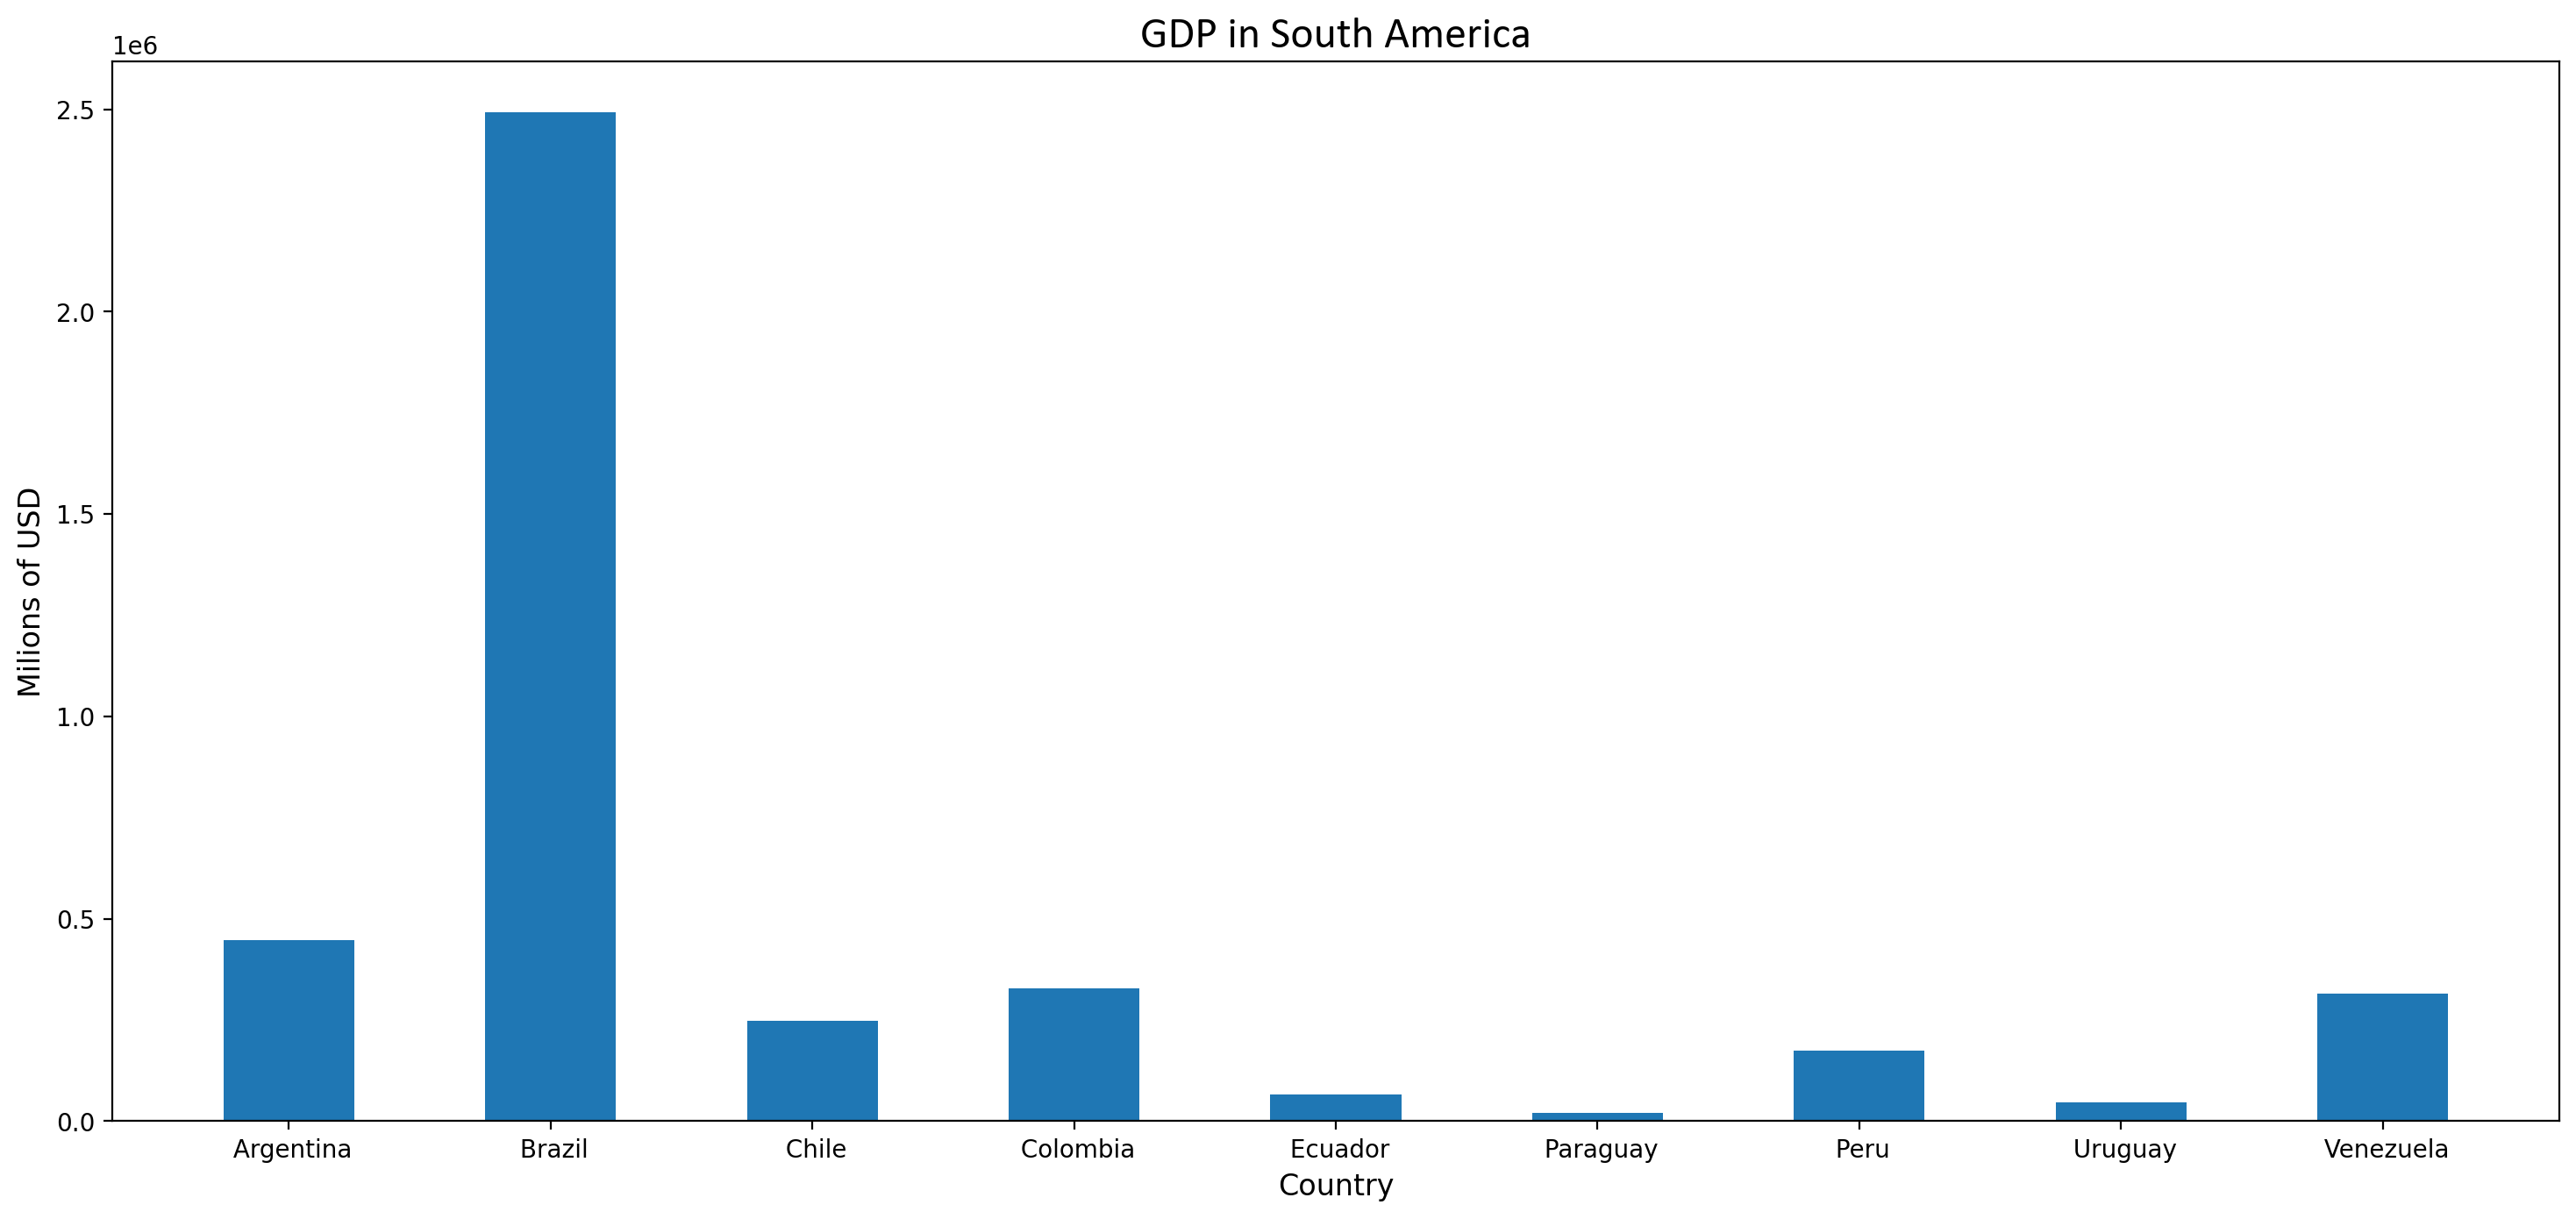

In [10]:
# Vẽ biểu đồ cột
plt.figure(figsize = (18,8), dpi = 200)
plt.bar(df1.index.get_level_values(0), df1["GDP (millions of US$)"], width = 0.5)
plt.title("GDP in South America", fontsize = 18, font = "calibri")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Milions of USD", fontsize = 12)
plt.show()

Nhận xét:
- Có sự chênh lệch đáng kể GDP giữa các nước ở khu vực Nam Mỹ, trong đó Brazil có GDP lớn nhất với khoảng 2,500 tỷ USD, Paraguay có GDP nhỏ nhất

# 3. Đánh giá tỉ lệ đóng góp GDP của Việt Nam trên tổng số GDP của 5 nước Đông Nam Á là Vietnam,  Indonesia, Cambodia, Thailand và Malaysia

In [11]:
df.Country.unique()

array(['\xa0Afghanistan', '\xa0Albania', '\xa0Algeria', '\xa0Angola',
       '\xa0Argentina', '\xa0Australia', '\xa0Austria', '\xa0Azerbaijan',
       '\xa0Bahrain', '\xa0Bangladesh', '\xa0Belarus', '\xa0Belgium',
       '\xa0Bolivia', '\xa0Bosnia and Herzegovina', '\xa0Botswana',
       '\xa0Brazil', '\xa0Brunei', '\xa0Bulgaria', '\xa0Burma',
       '\xa0Cambodia', '\xa0Cameroon', '\xa0Canada', '\xa0Chile',
       '\xa0China', '\xa0Colombia',
       '\xa0Congo, Democratic Republic of the',
       '\xa0Congo, Republic of the', '\xa0Costa Rica',
       "\xa0Côte d'Ivoire", '\xa0Croatia', '\xa0Cyprus',
       '\xa0Czech Republic', '\xa0Denmark', '\xa0Dominican Republic',
       '\xa0Ecuador', '\xa0Egypt', '\xa0El Salvador',
       '\xa0Equatorial Guinea', '\xa0Estonia', '\xa0Ethiopia',
       '\xa0Finland', '\xa0France', '\xa0Gabon', '\xa0Georgia',
       '\xa0Germany', '\xa0Ghana', '\xa0Greece', '\xa0Guatemala',
       '\xa0Honduras', '\xa0Hong Kong', '\xa0Hungary', '\xa0Iceland',
     

In [12]:
# tách dataframe chỉ chứa 5 nước Đông Nam Á bao gồm Vietnam, Indonesia, Cambodia, Thailand và Malaysia
conditions = (df.Country == "\xa0Vietnam") | (df.Country == "\xa0Indonesia") | (df.Country == "\xa0Cambodia") | (df.Country == "\xa0Thailand") | (df.Country == "\xa0Malaysia")
temp = df[conditions]

In [13]:
temp.head()

,Country,Continent,GDP (millions of US$)
19,Cambodia,Asia,12861
53,Indonesia,Asia,845680
70,Malaysia,Asia,278680
109,Thailand,Asia,345649
122,Vietnam,Asia,122722


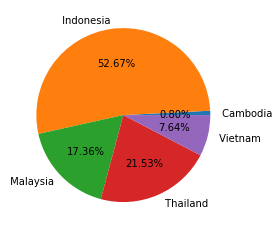

In [14]:
# Vẽ biểu đồ hình quạt
plt.pie(temp["GDP (millions of US$)"], labels = temp.Country, autopct = "%.2f%%")
plt.show()

Nhận xét:
- Tỷ trọng GDP của Việt Nam chỉ chiếm 7.64% trong tổng số 5 nước Đông Nam Á. 
- Xếp hạng 4/5